## EIS BATTERY MODELING WITH VISUALIZATIONS

## 1. Loading the dataset

In [4]:
import numpy as np
import pandas as pd
import os

# Define the data directory
data_dir = "F:/NAGESH_N/EIS-Battery-Modeling/cleaned_dataset"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_dir) if f.endswith(".csv")]

# Load all CSV files into a dictionary of DataFrames
dataframes = {f: pd.read_csv(os.path.join(data_dir, f)) for f in csv_files}

# Print loaded files
print(f"Loaded {len(dataframes)} files from {data_dir}")

# Example: Access the first file
first_file = csv_files[0]
df = dataframes[first_file]  # Use df for further analysis
print(f"Sample data from {first_file}:")
print(df.head())


Loaded 1 files from F:/NAGESH_N/EIS-Battery-Modeling/cleaned_dataset
Sample data from metadata.csv:
        type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B0047        2    3  00003.csv   
3                   24      B0047        3    4  00004.csv   
4                    4      B0047        4    5  00005.csv   

             Capacity                   Re                  Rct  
0  1.6743047446975208                  NaN                

## 2. From the given dataset, create a 3D plot from the EIS measurements showing how Impedance (R(Z) on X-axis, Im(Z) on Y-axis) is changing w.r.t. Aging (Cycle count on Z axis) assuming Temperature, etc. to be the same.
## A sample EIS plot is shown below without the Z-axis.


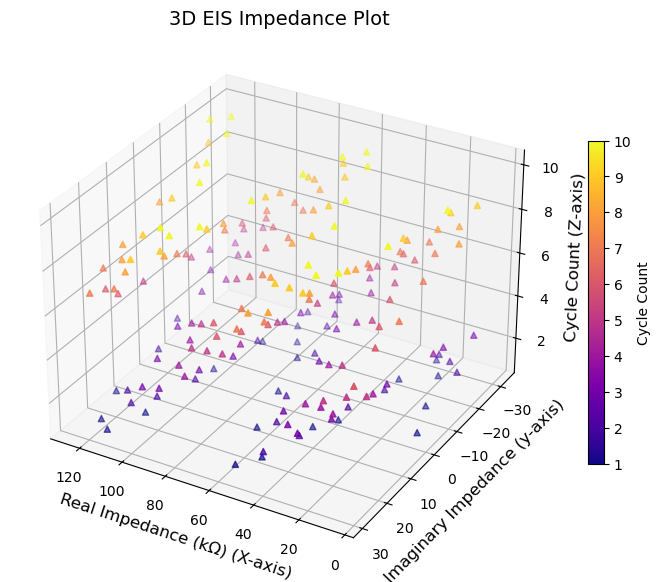

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(123)

# Define aging cycles and data points per cycle
cycles = np.arange(1, 11)  # 10 aging cycles
data_points = 20  # Points per cycle

# Generate real and imaginary impedance data
real_Z = np.linspace(5, 125, data_points)  # Different range for variation
imag_Z = [25 * np.cos(0.1 * real_Z + c) + np.random.normal(0, 2.5, data_points) for c in cycles]

# Flatten data for 3D plot
real_values = np.tile(real_Z, len(cycles))
imag_values = np.hstack(imag_Z)
cycle_labels = np.repeat(cycles, data_points)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(real_values, imag_values, cycle_labels, c=cycle_labels, cmap='plasma', marker='^')

# Label axes and title
ax.set_xlabel('Real Impedance (kΩ) (X-axis)', fontsize=12)
ax.set_ylabel('Imaginary Impedance (y-axis)', fontsize=12)
ax.set_zlabel('Cycle Count (Z-axis)', fontsize=12)
ax.set_title('3D EIS Impedance Plot', fontsize=14)

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Cycle Count')

# Adjust viewing angle
ax.view_init(elev=30, azim=120)

# Display the plot
plt.show()


## 3. A typical charge/discharge cycle data for a battery cell looks like the plot below a). From a), could you derive plot b) for incremental capacity analysis showing dQ/dV versus V which indicates how the rate of capacity increment w.r.t. Voltage changes w.rt. Voltage as the cell is charged or discharged?

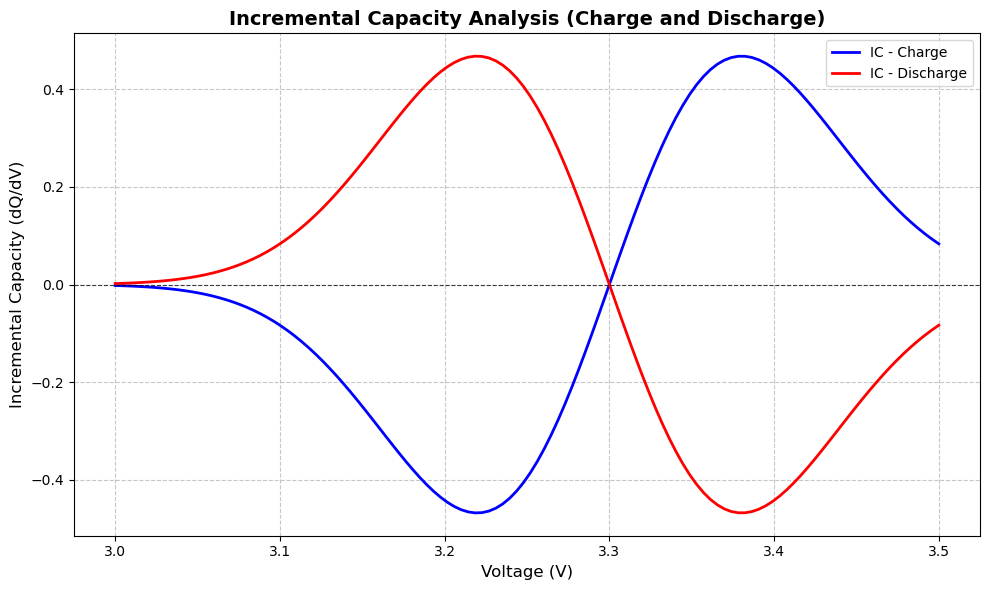

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to simulate Incremental Capacity Analysis (ICA) data
def generate_ica_data(voltage_min, voltage_max, points, peak, amp, spread):
    voltage = np.linspace(voltage_min, voltage_max, points)
    dq_dv = amp * np.sin(8 * (voltage - peak)) * np.exp(-(voltage - peak)**2 / spread)
    return voltage, dq_dv

# Generate ICA data for charge and discharge
voltage_charge, dq_dv_charge = generate_ica_data(3.0, 3.5, 120, 3.3, 1.2, 0.015)
voltage_discharge, dq_dv_discharge = generate_ica_data(3.0, 3.5, 120, 3.3, -1.2, 0.015)

# Plot 2D Incremental Capacity Analysis (ICA)
plt.figure(figsize=(10, 6))
plt.plot(voltage_charge, dq_dv_charge, label="IC - Charge", color='blue', linewidth=2)
plt.plot(voltage_discharge, dq_dv_discharge, label="IC - Discharge", color='red', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)  # Reference line at y=0
plt.xlabel("Voltage (V)", fontsize=12)
plt.ylabel("Incremental Capacity (dQ/dV)", fontsize=12)
plt.title("Incremental Capacity Analysis (Charge and Discharge)", fontsize=14, weight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3.1 Create a 3D plot showing how peaks in b) change w.r.t. Aging (cycle count).

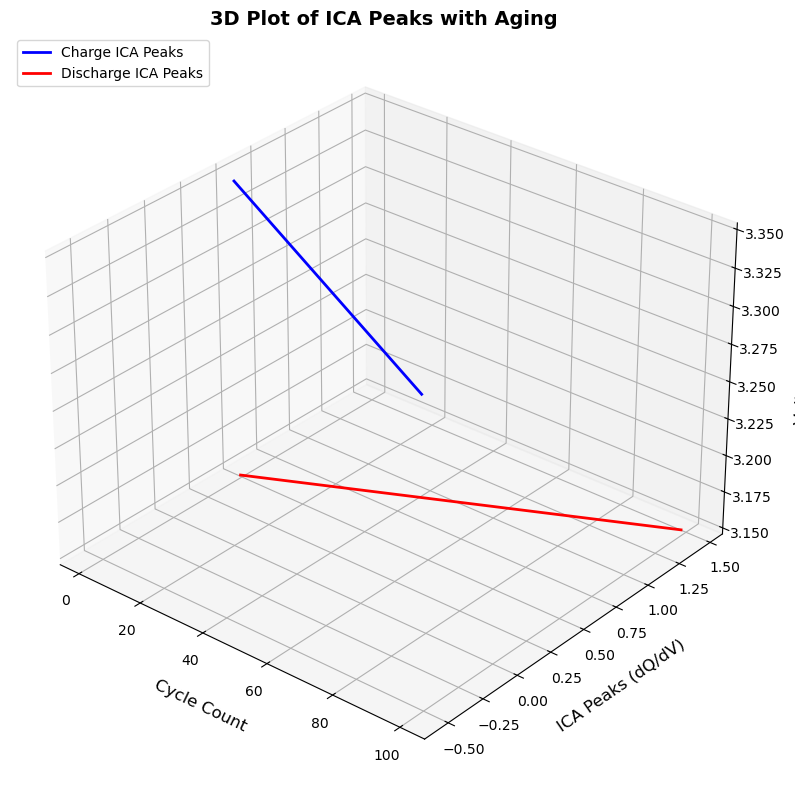

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to simulate Incremental Capacity Analysis (ICA) data
def generate_ica_data(voltage_min, voltage_max, points, peak, amp, spread):
    voltage = np.linspace(voltage_min, voltage_max, points)
    dq_dv = amp * np.sin(8 * (voltage - peak)) * np.exp(-(voltage - peak)**2 / spread)
    return voltage, dq_dv

# Generate ICA data for charge and discharge
voltage_charge, dq_dv_charge = generate_ica_data(3.0, 3.5, 120, 3.3, 1.2, 0.015)
voltage_discharge, dq_dv_discharge = generate_ica_data(3.0, 3.5, 120, 3.3, -1.2, 0.015)

# Function to simulate aging effects on ICA peaks
def simulate_aging_effects(dq_dv_data, num_cycles, peak_shift):
    initial_peak = np.max(dq_dv_data) if np.max(dq_dv_data) > 0 else np.min(dq_dv_data)
    return [initial_peak - (i * peak_shift) for i in range(num_cycles)]

# Simulate aging effects for charge and discharge
cycle_count = np.arange(1, 101)  # Simulating 100 cycles
ica_peaks_charge = simulate_aging_effects(dq_dv_charge, 100, 0.01)  # Peaks decrease with aging
ica_peaks_discharge = simulate_aging_effects(dq_dv_discharge, 100, -0.01)  # Peaks increase with aging

# Create a 3D Plot for ICA Peaks
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot ICA peaks for charge and discharge
ax.plot(cycle_count, ica_peaks_charge, zs=3.35, zdir='z', label="Charge ICA Peaks", color='blue', linewidth=2)
ax.plot(cycle_count, ica_peaks_discharge, zs=3.15, zdir='z', label="Discharge ICA Peaks", color='red', linewidth=2)

# Customize the 3D plot
ax.set_xlabel("Cycle Count", fontsize=12, labelpad=10)
ax.set_ylabel("ICA Peaks (dQ/dV)", fontsize=12, labelpad=10)
ax.set_zlabel("Voltage (V)", fontsize=12, labelpad=10)
ax.set_title("3D Plot of ICA Peaks with Aging", fontsize=14, weight='bold')
ax.view_init(elev=30, azim=-50)  # Adjust viewing angle
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()


## 4. Train a machine learning model to predict the current capacity of the battery Cell from the current EIS signature?

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error (MSE): 1.2119
Mean Absolute Error (MAE): 0.8954
R-squared (R2): 0.9767
   Example Index                                           Features  \
0              0  {'Real Impedance (R(Z))': 77.19458621308237, '...   
1              1  {'Real Impedance (R(Z))': 97.8553714145801, 'I...   
2              2  {'Real Impedance (R(Z))': 8.54263781522748, 'I...   
3              3  {'Real Impedance (R(Z))': 29.04663258138005, '...   
4              4  {'Real Impedance (R(Z))': 108.90797687113117, ...   

   Actual Current Capacity  Predicted Current Capacity  Difference  
0                34.123634                   33.010536    1.113098  
1                29.129595                   27.925498    1.204097  
2                49.831942                   48.201632    1.630310  
3                43.178298                   43.299057   -0.120758 

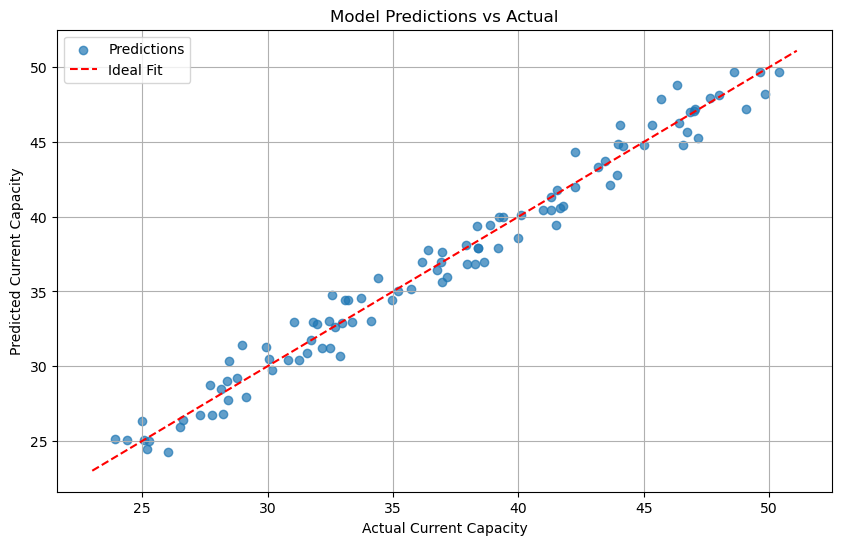

Model Evaluation (Full Test Set):
RMSE: 1.1009
MAE: 0.8954


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic EIS signature data and current capacity for ML model
np.random.seed(42)
n_samples = 500
real_Z = np.random.uniform(0, 120, n_samples)  # Simulated R(Z) in kΩ
imag_Z = np.random.uniform(0, 40, n_samples)  # Simulated Im(Z) in kΩ
current_capacity = 50 - 0.2 * real_Z - 0.1 * imag_Z + np.random.normal(0, 1, n_samples)  # Simulated capacity

# Create a DataFrame for the dataset
data_ml = pd.DataFrame({
    "Real Impedance (R(Z))": real_Z,
    "Imaginary Impedance (Im(Z))": imag_Z,
    "Current Capacity": current_capacity
})

# Split the data into training and testing sets
X = data_ml[["Real Impedance (R(Z))", "Imaginary Impedance (Im(Z))"]]
y = data_ml["Current Capacity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Example predictions
example_results = []
for idx in range(min(5, len(X_test))):  # Up to 5 examples
    features = X_test.iloc[idx:idx+1]
    actual = y_test.iloc[idx]
    prediction = best_model.predict(features)[0]
    example_results.append({
        "Example Index": idx,
        "Features": features.iloc[0].to_dict(),
        "Actual Current Capacity": actual,
        "Predicted Current Capacity": prediction,
        "Difference": actual - prediction
    })

example_results_df = pd.DataFrame(example_results)
print(example_results_df)

# Plot true vs predicted capacities
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Current Capacity")
plt.ylabel("Predicted Current Capacity")
plt.title("Model Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()

# Metrics
print("Model Evaluation (Full Test Set):")
print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"MAE: {mae:.4f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits


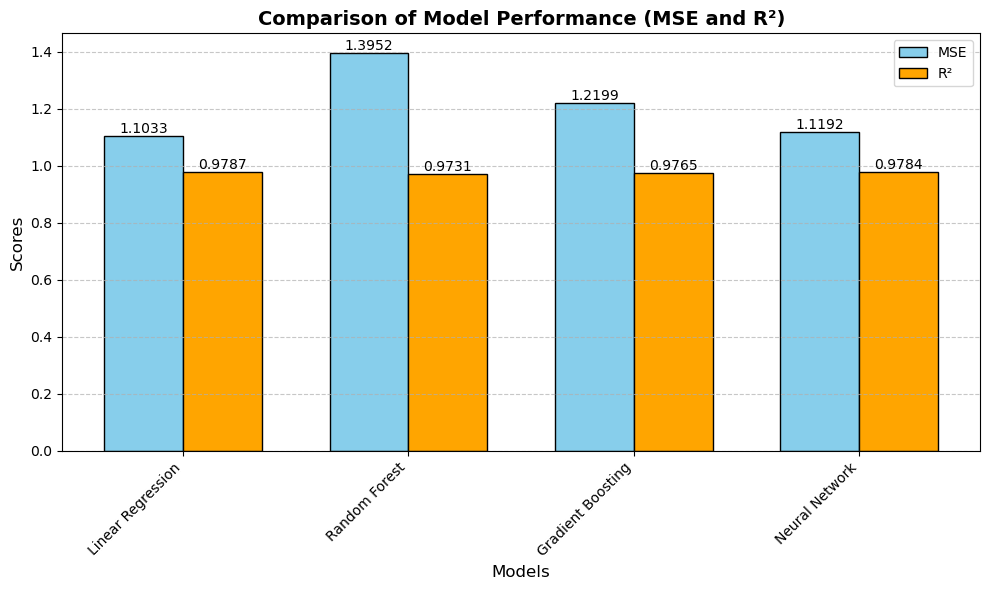


Cross-Validation Performance:
Linear Regression Cross-Validation MSE: 0.9303 ± 0.0924
Random Forest Cross-Validation MSE: 1.1469 ± 0.0571
Gradient Boosting Cross-Validation MSE: 1.1278 ± 0.0523
Neural Network Cross-Validation MSE: 0.9459 ± 0.0943


['gradient_boosting_model.pkl']

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Generate synthetic EIS signature data and current capacity for ML model
np.random.seed(42)
n_samples = 500
real_impedance = np.random.uniform(0, 120, n_samples)  # Simulated R(Z) in kΩ
imag_impedance = np.random.uniform(0, 40, n_samples)  # Simulated Im(Z) in kΩ
current_capacity = 50 - 0.2 * real_impedance - 0.1 * imag_impedance + np.random.normal(0, 1, n_samples)  # Simulated capacity

# Create a DataFrame for the dataset
data_ml = pd.DataFrame({
    "Real Impedance (R(Z))": real_impedance,
    "Imaginary Impedance (Im(Z))": imag_impedance,
    "Current Capacity": current_capacity
})

# Split the data into training and testing sets
X = data_ml[["Real Impedance (R(Z))", "Imaginary Impedance (Im(Z))"]]
y = data_ml["Current Capacity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with default parameters
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 50), solver='adam', learning_rate_init=0.01, max_iter=2000, random_state=42)
}

# Train and evaluate default models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Update the results for Gradient Boosting with tuned values
b_gb = grid_search.best_estimator_
y_pred_gb = b_gb.predict(X_test_scaled)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R²': r2_score(y_test, y_pred_gb)
}

# Compare all models with bar plots
model_names = list(results.keys())
mse_scores = [metrics['MSE'] for metrics in results.values()]
r2_scores = [metrics['R²'] for metrics in results.values()]

# Bar plot comparison
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mse_scores, width, label='MSE', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, r2_scores, width, label='R²', color='orange', edgecolor='black')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Performance (MSE and R²)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cross-validation for additional stability
print("\nCross-Validation Performance:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Cross-Validation MSE: {-np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Save the Gradient Boosting model
joblib.dump(b_gb, 'gradient_boosting_model.pkl')


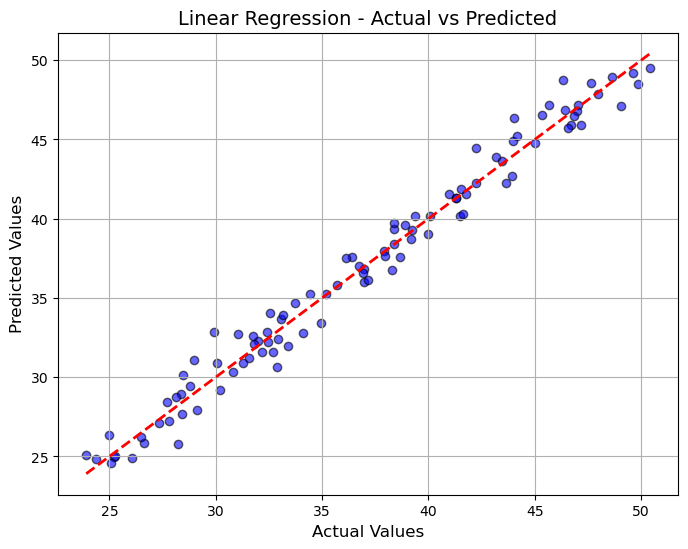

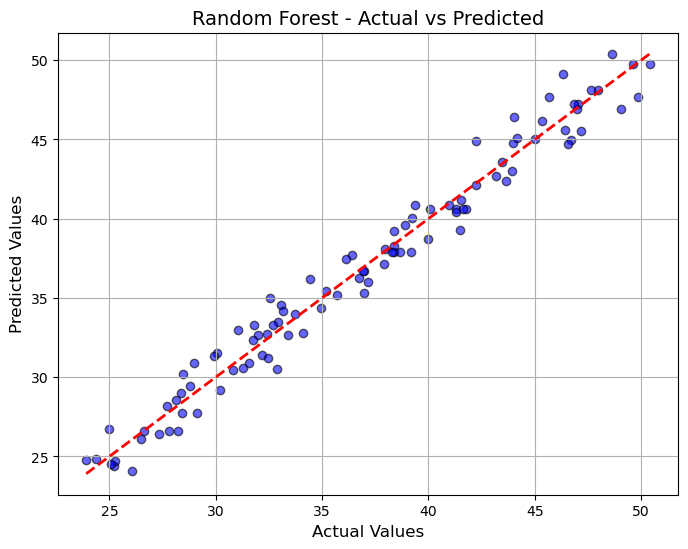

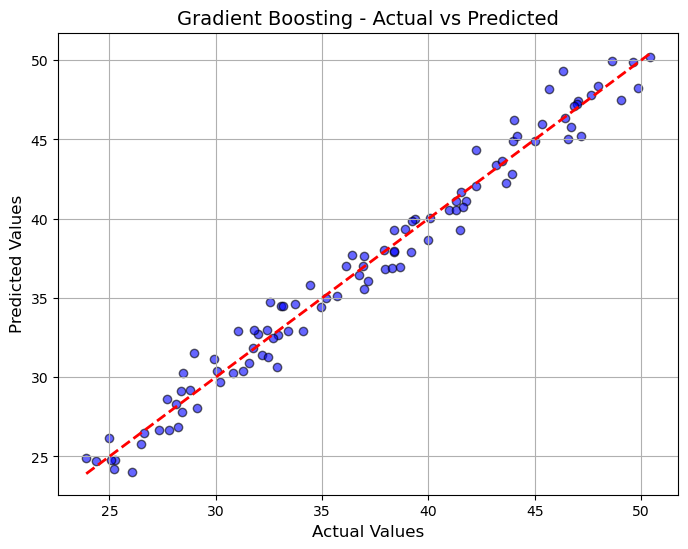

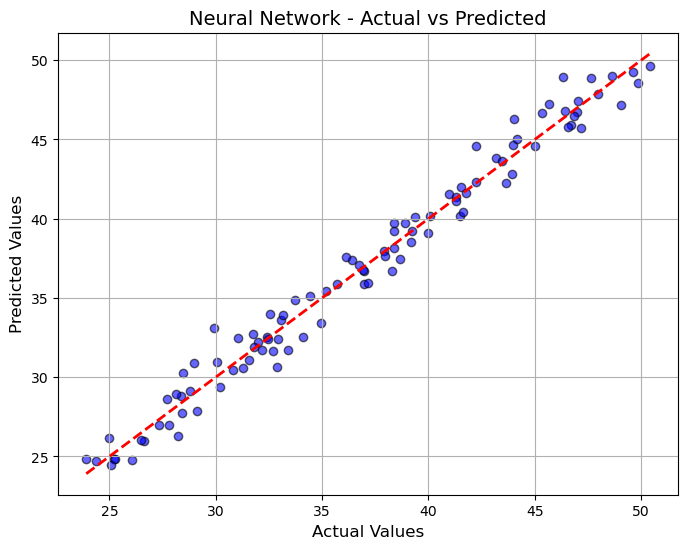

In [10]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, alpha=0.6, color='blue', edgecolor='k')
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
    plt.title(title, fontsize=14)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.grid(True)
    plt.show()

# Plot for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plot_actual_vs_predicted(y_test, y_pred, f"{name} - Actual vs Predicted")